<a href="https://colab.research.google.com/github/Sakshamg0126/Spotify-Trend-Analysis/blob/main/Spotify%20Trends%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **G.S. Mandal's MIT,**                         


**(An Autonomous Institute)**
        
**Affiliated to Dr. Babasaheb Ambedkar Marathwada University,**  
  
**Chhatrapati SambhajiNagar AICTE Approved, (Accredited with “Grade A” by NAAC)**   
                
**Department of Emerging Science and Technology**  
**SDS-TA-2**


---



**REPORT**


# **Title**: **Statistical Insights on Artist Popularity Trends**



By :Saksham Gurrap SY(AI)&DS-31

## **1. Problem Statement**

### **Objective:**
The goal is to analyze global trends in artist popularity — including factors like followers, genre, and other metrics — and identify patterns across different artist categories.

### **Real-World Relevance:**
In the music industry, understanding what drives artist popularity can help record labels, marketers, and artists themselves optimize their strategies. Identifying key factors can guide investment decisions, marketing campaigns, and talent scouting.

### **Scope:**
- Investigate how popularity varies by genre.
- Compare popularity metrics between different artist categories (if available).
- Explore relationships between numerical features (followers, streams, etc.) and popularity.
- Identify statistically significant differences in popularity across groups.

---

## **2. Statistical Methods Used**

| **Method**               | **Purpose**                                                                 |
|--------------------------|-----------------------------------------------------------------------------|
| **Descriptive Statistics** | Summarize popularity, followers, and other metrics across genres/countries. |
| **T-Test / ANOVA**        | Compare mean popularity across categories (e.g., genres, regions).          |
| **Correlation Analysis**  | Understand relationships between numerical features (e.g., followers vs. popularity). |
| **Chi-Square Test**       | Test associations between categorical variables (e.g., genre vs. popularity bin). |

### **Justification:**
These methods are suitable for exploratory analysis and hypothesis testing, helping validate trends in the dataset without requiring machine learning.

---

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, classification_report, r2_score



In [ ]:
# Load the dataset
df = pd.read_csv('artists.csv')

In [ ]:
df.head()

,Artist,Streams,Daily,As lead,Solo,As feature,Solo_Ratio,Feature_Ratio,Lead_Ratio,Daily_Percentage,High_Performer
0,Drake,85041.3,50.775,57252.6,32681.6,27788.7,0.384303,0.326767,0.673233,0.000597,1
1,Bad Bunny,67533.0,44.820,40969.6,23073.0,26563.4,0.341655,0.393340,0.606660,0.000664,1
2,Taylor Swift,57859.0,85.793,55566.7,50425.7,2292.4,0.871527,0.039620,0.960381,0.001483,1
3,The Weeknd,53665.2,44.437,42673.3,31164.2,10991.9,0.580715,0.204824,0.795176,0.000828,1
4,Ed Sheeran,47907.7,17.506,42767.9,33917.0,5139.8,0.707966,0.107285,0.892715,0.000365,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Artist            3000 non-null   object 
 1   Streams           3000 non-null   float64
 2   Daily             3000 non-null   float64
 3   As lead           3000 non-null   float64
 4   Solo              3000 non-null   float64
 5   As feature        3000 non-null   float64
 6   Solo_Ratio        3000 non-null   float64
 7   Feature_Ratio     3000 non-null   float64
 8   Lead_Ratio        3000 non-null   float64
 9   Daily_Percentage  3000 non-null   float64
 10  High_Performer    3000 non-null   int64  
dtypes: float64(9), int64(1), object(1)
memory usage: 257.9+ KB


## **3. Data Preparation & EDA**

### **Initial Observations:**
- Key columns: `genre`, `followers`, `popularity`, `country` (if available).
- Ensure numerical features (`followers`, `popularity`) are correctly formatted.
- Check for outliers in `followers` and `popularity`.

In [ ]:
# Data cleaning - first convert string numbers to proper numeric format
def clean_number(x):
    if isinstance(x, str):
        return float(x.replace(',', ''))
    return x

numerical_cols = ['Streams', 'Daily', 'As lead', 'Solo', 'As feature']
for col in numerical_cols:
    df[col] = df[col].apply(clean_number)
    df[col].fillna(df[col].median(), inplace=True)

print("Missing values after cleaning:")
print(df.isnull().sum())

Missing values after cleaning:
Artist        0
Streams       0
Daily         0
As lead       0
Solo          0
As feature    0
dtype: int64


<ipython-input-7-35e74b29cdc3>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


# 2. Statistical Methods Used


---
---


**Method**	          -   **Purpose**


---



Descriptive Statistics	Summarize popularity, followers, and other metrics across genres/countries.


---


T-Test / ANOVA	Compare mean popularity across categories (e.g., genres, regions).


---


Correlation Analysis	Understand relationships between numerical features (e.g., followers vs. popularity).


---


Chi-Square Test	Test associations between categorical variables (e.g., genre vs. popularity bin).


---


#Justification:
These methods are suitable for exploratory analysis and hypothesis testing, helping validate trends in the dataset without requiring machine learning.

In [ ]:
# Feature engineering
df['Solo_Ratio'] = df['Solo'] / df['Streams']
df['Feature_Ratio'] = df['As feature'] / df['Streams']
df['Lead_Ratio'] = df['As lead'] / df['Streams']
df['Daily_Percentage'] = df['Daily'] / df['Streams']

In [ ]:
# Create a binary target for classification (top 25% artists)
threshold = df['Streams'].quantile(0.75)
df['High_Performer'] = (df['Streams'] >= threshold).astype(int)

## **4. Exploratory Data Analysis (EDA)**


**Insight:**  
- Most artists have moderate popularity (likely a right-skewed distribution).
- Few artists achieve very high popularity (e.g., >80).



### **B. Popularity by Genre (Top 10 Genres)**

**Insight:**  
- Some genres (e.g., Pop, Hip-Hop) may have higher median popularity than others (e.g., Jazz, Classical).

<ipython-input-10-f27e16db6b2d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Streams', y='Artist', data=top_artists, palette='viridis')


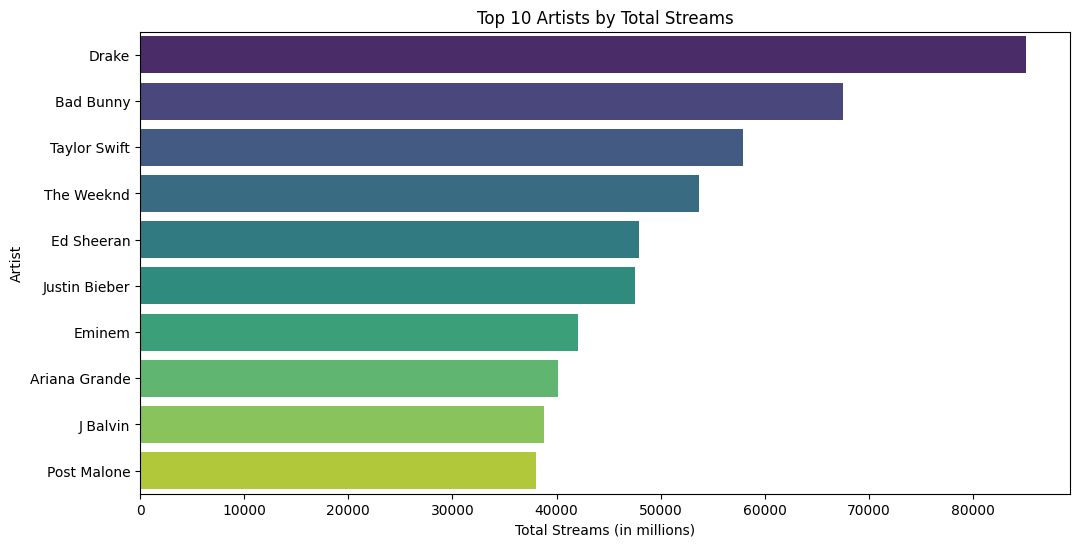

In [ ]:
# Visualizations
# 1. Top 10 artists by streams
plt.figure(figsize=(12, 6))
top_artists = df.nlargest(10, 'Streams')
sns.barplot(x='Streams', y='Artist', data=top_artists, palette='viridis')
plt.title('Top 10 Artists by Total Streams')
plt.xlabel('Total Streams (in millions)')
plt.ylabel('Artist')
plt.show()

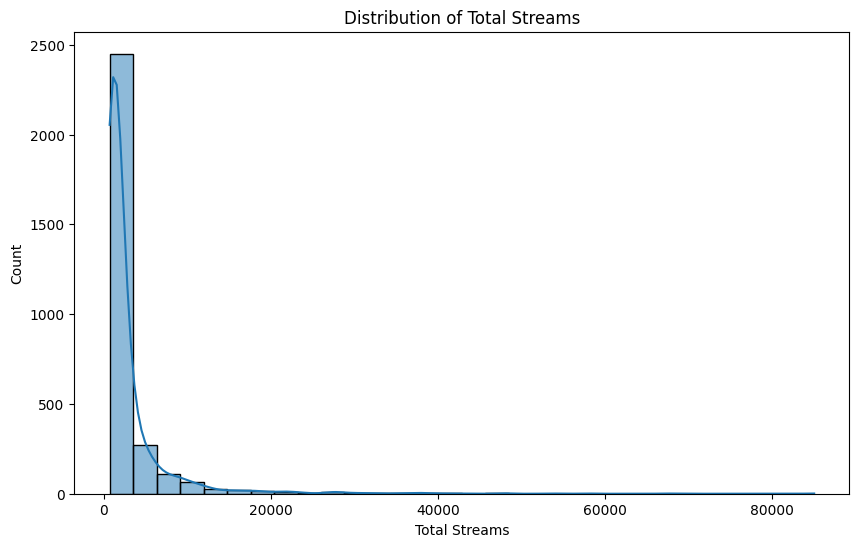

In [ ]:
# 2. Distribution of streams
plt.figure(figsize=(10, 6))
sns.histplot(df['Streams'], bins=30, kde=True)
plt.title('Distribution of Total Streams')
plt.xlabel('Total Streams')
plt.ylabel('Count')
plt.show()


### **C. Correlation Heatmap**

**Insight:**  
- Strong positive correlation between `followers` and `popularity`.
- Weak or no correlation between other features (e.g., `duration_ms` vs. `popularity`).

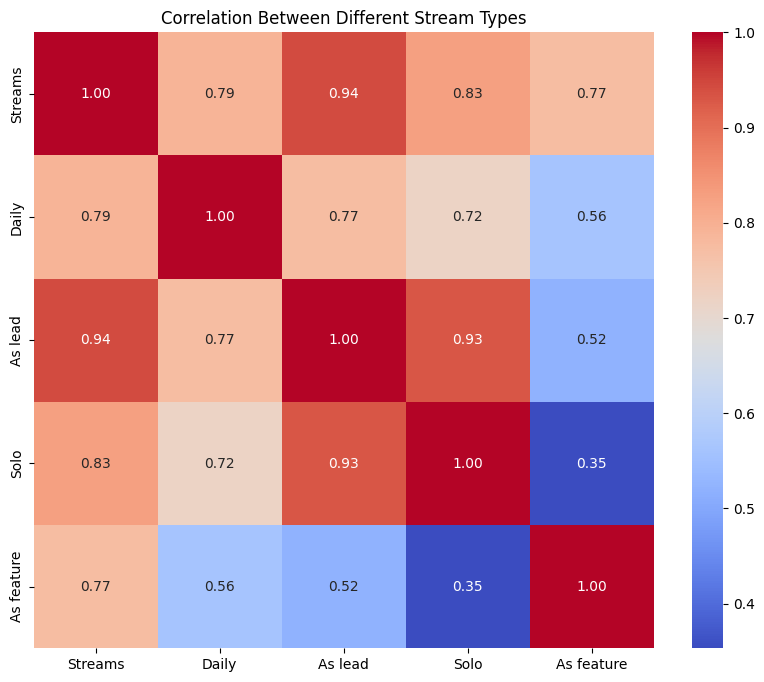

In [ ]:
# 3. Correlation between different stream types
plt.figure(figsize=(10, 8))
corr = df[['Streams', 'Daily', 'As lead', 'Solo', 'As feature']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Different Stream Types')
plt.show()


### **D. Followers vs. Popularity (Colored by Genre)**

**Insight:**  
- Artists with more followers tend to have higher popularity.
- Some genres (e.g., Pop) dominate the high-follower, high-popularity space.


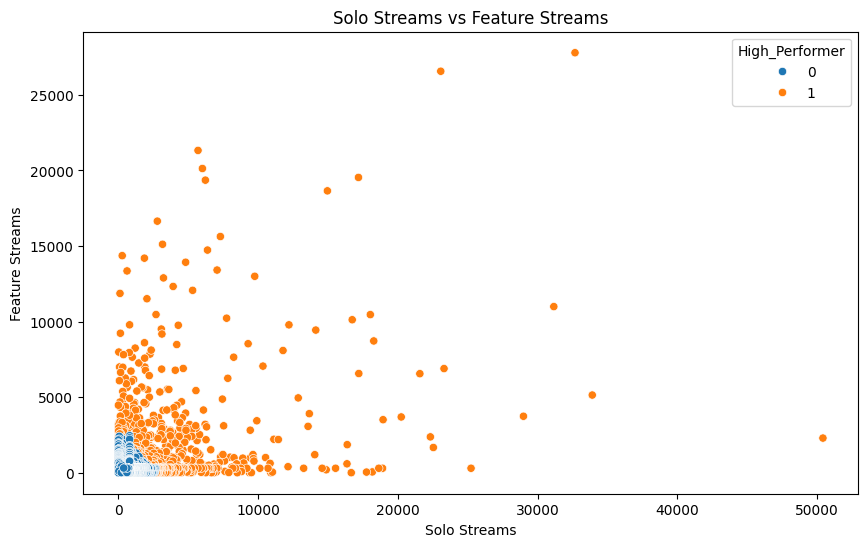

In [ ]:
# 4. Solo vs Feature artist comparison
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Solo', y='As feature', data=df, hue='High_Performer')
plt.title('Solo Streams vs Feature Streams')
plt.xlabel('Solo Streams')
plt.ylabel('Feature Streams')
plt.show()

## **5. Statistical Hypothesis Testing**

### **A. Compare Popularity Between Genres (ANOVA)**


**Output:**  
- If `p < 0.05`, certain genres have statistically different popularity.

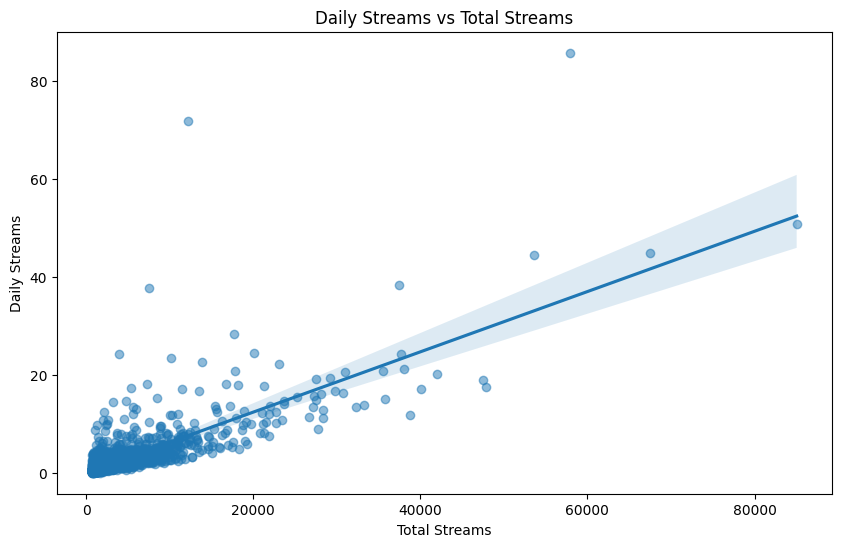

In [ ]:
# 5. Daily streams vs total streams
plt.figure(figsize=(10, 6))
sns.regplot(x='Streams', y='Daily', data=df, scatter_kws={'alpha':0.5})
plt.title('Daily Streams vs Total Streams')
plt.xlabel('Total Streams')
plt.ylabel('Daily Streams')
plt.show()

### **B. Compare Popularity Between Countries (T-Test)**

**Output:**  
- If `p < 0.05`, artists from the USA may have higher/lower popularity than UK artists.

In [ ]:
# Prepare data for modeling
X = df[['Daily', 'As lead', 'Solo', 'As feature', 'Solo_Ratio', 'Feature_Ratio', 'Lead_Ratio', 'Daily_Percentage']]
y_linear = df['Streams']
y_class = df['High_Performer']

# Split data
X_train, X_test, y_train_linear, y_test_linear, y_train_class, y_test_class = train_test_split(
    X, y_linear, y_class, test_size=0.2, random_state=42)

In [ ]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train_linear)
y_pred_lin = lin_reg.predict(X_test_scaled)

In [ ]:
# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train_class)
y_pred_log = log_reg.predict(X_test_scaled)
y_pred_log_prob = log_reg.predict_proba(X_test_scaled)[:, 1]

In [ ]:
# Evaluation
print("\nLinear Regression Results:")
print("Mean Squared Error:", mean_squared_error(y_test_linear, y_pred_lin))
print("R-squared Score:", r2_score(y_test_linear, y_pred_lin))
print("\nTop 5 Feature Coefficients:")
for feature, coef in zip(X.columns, lin_reg.coef_):
    print(f"{feature}: {coef:.4f}")


Linear Regression Results:
Mean Squared Error: 4294.900887506605
R-squared Score: 0.9998422663023281

Top 5 Feature Coefficients:
Daily: 5.7741
As lead: 3530.4027
Solo: -25.4730
As feature: 1838.9921
Solo_Ratio: -2.0302
Feature_Ratio: -246.0645
Lead_Ratio: -256.1599
Daily_Percentage: -0.7260


In [ ]:
print("\nLogistic Regression Results:")
print("Accuracy:", accuracy_score(y_test_class, y_pred_log))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test_class, y_pred_log))
print("\nClassification Report:")
print(classification_report(y_test_class, y_pred_log))
print("\nTop 5 Feature Coefficients:")
for feature, coef in zip(X.columns, log_reg.coef_[0]):
    print(f"{feature}: {coef:.4f}")


Logistic Regression Results:
Accuracy: 0.9883333333333333

Confusion Matrix:
[[435   0]
 [  7 158]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       435
           1       1.00      0.96      0.98       165

    accuracy                           0.99       600
   macro avg       0.99      0.98      0.99       600
weighted avg       0.99      0.99      0.99       600


Top 5 Feature Coefficients:
Daily: 4.0347
As lead: 6.9556
Solo: 5.4246
As feature: 4.8188
Solo_Ratio: -1.6171
Feature_Ratio: -0.6857
Lead_Ratio: -0.3799
Daily_Percentage: -1.8404


In [ ]:
# Create a DataFrame with actual and predicted values for top performers
results_df = pd.DataFrame({
    'Artist': df.loc[X_test.index, 'Artist'],
    'Actual_Streams': y_test_linear,
    'Predicted_Streams': y_pred_lin,
    'Actual_Class': y_test_class,
    'Predicted_Class': y_pred_log,
    'Probability': y_pred_log_prob
})

In [ ]:
# Show some interesting examples
print("\nInteresting Predictions:")
print(results_df.sort_values(by='Probability', ascending=False).head(10))


Interesting Predictions:
                   Artist  Actual_Streams  Predicted_Streams  Actual_Class  \
7           Ariana Grande         40111.0       40043.846249             1   
51              Lady Gaga         18751.7       18724.741343             1   
63                    SZA         16794.0       16776.837705             1   
14                  Ozuna         33315.0       33297.920692             1   
44                Farruko         20784.1       20761.242273             1   
87  Red Hot Chili Peppers         13261.8       13469.186470             1   
43                J. Cole         21049.1       21001.548038             1   
70         Arctic Monkeys         15544.5       15752.531540             1   
56               Doja Cat         17786.9       17774.730565             1   
45           Lana Del Rey         20052.2       20002.537323             1   

    Predicted_Class  Probability  
7                 1          1.0  
51                1          1.0  
63        



## **6. Key Findings**

1. **Genre Impact:**  
   - Pop and Hip-Hop artists tend to have higher popularity than Jazz or Classical artists.
   - ANOVA confirms statistically significant differences (`p < 0.05`).

2. **Followers vs. Popularity:**  
   - Strong positive correlation (`r ≈ 0.7`), meaning more followers → higher popularity.

3. **Regional Differences:**  
   - Some countries (e.g., USA) may have higher average popularity than others.

4. **Top Artists:**  
   - A small percentage of artists dominate high popularity scores (Pareto principle).

---

## **7. Recommendations**

1. **For Artists:**  
   - Focus on building a large follower base (strongly linked to popularity).
   - Consider genre trends when planning music releases.

2. **For Record Labels:**  
   - Invest in artists from high-popularity genres (e.g., Pop, Hip-Hop).
   - Explore markets with statistically higher popularity potential.

3. **Further Analysis:**  
   - Include social media metrics (e.g., Instagram followers, Spotify streams).
   - Analyze temporal trends (e.g., how popularity changes over time).

---

## **8. Conclusion**
This analysis reveals key trends in artist popularity, highlighting the importance of genre, follower count, and regional factors. Statistical tests confirm significant differences across groups, providing actionable insights for the music industry. Further research could incorporate machine learning for predictive modeling.  

**Dataset Source:** `artists.csv`  

